##讀入圖片顯示,
讀入的圖片物件型態為ndarray(N-dimensional array object)(多維度陣列物件)
這個陣列的行列數是可變的,
但陣列包含的總元素不變,
比如1*6陣列可以任意轉換成3*2,
而圖片物件ndarray實際上是一個多維的int陣列,
print type(img)會得到ndarray,
print img.dtype會傳回陣列內容的型態uint8,
將這個型態轉換成其他相容的型態(如float32)並不影響圖片呈現

In [3]:
import cv2
import numpy as np
im = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/test3.png')
cv2.imshow('im', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

參考文件:
https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html#display-image

讀取圖片方法,傳回包含圖片檔案的物件
cv2.imread("檔案路徑",套用模式)
套用模式有三種:
1.cv2.IMREAD_COLOR RGB模式,會忽略透明度,即RGBA只辨識RGB,這是預設模式
2.cv2.IMREAD_GRAYSCALE 灰階模式,只有黑灰白
3.cv2.IMREAD_UNCHANGED RGBA模式

顯示圖片在視窗的方法
cv2.imshow("視窗名稱",讀入圖片的物件)
字串會顯示在圖片的視窗的title上, 不重要
##若想呼叫該視窗,可用視窗名稱去呼叫

設定圖片顯示多久的方法
cv2.waitKey(時間長度)
時間長度單位是millisecond,
給0的話會停住(持續保持顯示圖片的狀態)
有聆聽鍵盤輸入的功能(我還不會用)

清除此次運作程式叫出的所有視窗
cv2.destroyAllWindows()
清除指定的視窗
cv2.destroyWindow("視窗名稱")

In [31]:
import cv2
import numpy as np
im = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('testtest', im)
cv2.waitKey(0)
cv2.destroyAllWindows()


產生一個空視窗的方法
cv2.namedWindow("視窗名稱","設定視窗大小")
注意!!只要產生視窗就一定要設定cv2.waitKey(0)與cv2.destroyAllWindows()
他們是一起的!!
否則有可能會當掉or程式不正常結束!!
設定視窗大小有兩種:
1.cv2.WINDOW_AUTOSIZE 會自動調整大小,沒有圖片時顯示預設大小,這是預設值
2.cv2.WINDOW_NORMAL 這是視窗大小 = 圖片大小,沒有圖片仍先套用圖片大小

In [3]:
import cv2
import numpy as np
import time
cv2.namedWindow("koala", cv2.WINDOW_AUTOSIZE)
time.sleep(3) ##產生視窗3秒後才載入圖片
img_ko = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/koala.jpg')
cv2.imshow('koala',img_ko)
cv2.waitKey(0)
cv2.destroyAllWindows()

將圖片存檔到硬碟
cv2.imwrite("存檔路徑",圖片物件)
此方法無法執行
可能是安裝cv2不完整
error: C:\builds\master_PackSlaveAddon-win64-vc12-static\opencv\modules\imgcodecs\src\loadsave.cpp:439: error: (-2) could not find a writer for the specified extension in function cv::imwrite_

請先用python內建的方法存檔
########################
此方法可用
cv2.imwrite("存檔檔名",圖片物件)
只能給檔名(XXX.png)且必須是png格式,不能指定路徑,檔案會存在home資料夾底下
存檔成功會傳回True

In [25]:
import cv2
im = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imwrite("witch_gray.png",im)


True

教程範例:
讀入圖片, 轉成灰階,視窗顯示圖片,
聆聽鍵盤,如果是ESC則關閉視窗,
如果是s鍵則存檔+關閉視窗

In [30]:
import numpy as np
import cv2

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',cv2.IMREAD_GRAYSCALE)
cv2.imshow('image',img)
k = cv2.waitKey(0)                        #存入變數聆聽事件
#k = cv2.waitKey(0) & 0xFF                #如果是64位元,教程建議加上 &0xFF
if k == 27:                               #27為ESC鍵的代號
    cv2.destroyAllWindows()
elif k == ord('s'):                       #字母鍵寫法ord("鍵")
    #cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

搭配matplotlib套件
from matplotlib import pyplot

加上這行會將圖片顯示在notebook裡面:
%matplotlib inline
沒加上這行則會呼叫出matplot視窗載入圖片,
有matplot內建的存檔按鈕及其他功能可用

plt.xticks([]), plt.yticks([]) 令X與Y軸量尺為空 = 隱藏X與Y軸

注意搭配matplotlib時,
讀入圖片請寫成
img = cv2.imread("檔案路徑",0)
0表示停用cv2的顏色處理流程,
因為cv2與matplotlib的顏色處理方法不同,
沒有停用的話會造成顏色干擾, 
輸出的圖片顏色處理會錯誤

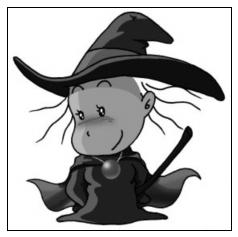

In [23]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = cv2.imread("檔案路徑")
沒有停用的結果如下

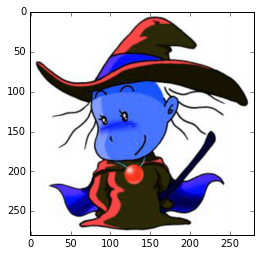

In [29]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/witch.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.show()

參考文件:
https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

辨識圖片內的角點(corner),哈里斯角點檢測方法
cv2.cornerHarris(灰階圖物件,blockSize,ksize,k)
此方法用於灰階圖準確度才高,所以記得先處理成灰階圖物件才傳入
此方法傳回的是角點位置圖的物件

blockSize = 標記點的大小,單位是像素

ksize = 此值必須是奇數的整數,且介於1~31之間,否則會報錯

k值是Harris Corner equation的常數項,
k越大則M越小,這會導致要更尖的角才會被辨識出來,
k=0.2已經使得90度角不一定會被辨識出來,請微量調整;此值可以小於0.1


In [21]:
import cv2
import numpy as np

filename = 'C:/Users/BIG DATA/Anaconda2/imgs/test3.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #灰階處理

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)  #計算出的角點位置圖物件存到dst變數中

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]
#算出是角的地方加上標記點
#門檻值0.01,意義與k值相近,此值越高則角度要越尖的才會被加上標記
#色碼順序[B,G,R],範圍0~255

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27: #按下ESC
    cv2.destroyAllWindows()

以matplotlib輸出的版本
注意RGB的順序

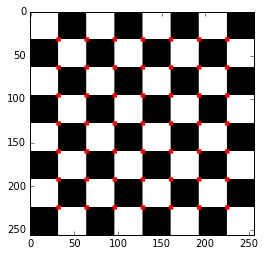

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'C:/Users/BIG DATA/Anaconda2/imgs/ky.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #灰階處理

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04) #計算出的角點位置圖物件存到dst變數中

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[255,0,0]
#matplotlib的色碼順序[R,G,B] 範圍一樣是0~255


#cv2.imshow("dst",img) #改用plt呈現結果圖片
plt.imshow(img)
#if cv2.waitKey(0) & 0xff == 27:
#   cv2.destroyAllWindows()

修正各角的標記點位置以及求出幾何中心教程範例:
角用紅點標記,refine後用綠點標記,最後算出的幾何中心以綠點標記,
圖要放很大(放大500%)才看得到點
這個範例出現底下三個新東西:
參考文件:
http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html#connectedcomponents
cv2.connectedComponentsWithStats(圖片物件)
還沒搞懂這東西怎麼運作的,
目前知道這方法會傳回一個包含4個東西的list,
後三個東西是陣列物件,其中最後一個是幾何中心座標之類的數據

參考文件:
http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html
http://www.ibm.com/developerworks/cn/opensource/os-cn-spark-practice4/
criteria = (type,max_iter,epsilon)
這個方法的寫法固定是寫這樣的,
解釋這個方法之前要先複習Kmean分群怎麼做的?
忘記的人請看第二個參考文件,或是去K課本...
簡單的說有4個步驟:
1.選擇K個初始點當作中心點
2.把其餘的點都對中心點計算距離,把距離相近的分作一群
3.分好群後重新計算每個群內部的距離平均值作為新的中心點
4.重複2與3直到滿足終止條件為止.
終止條件通常有3種:
1.中心不再移動
2.重複循環已達設定的上限次數
3.中心移動幅度小於設定的門檻值
那麼現在可以看看方法右邊的參數是什麼?
max_iter = 最大循環次數,常見10~100次
epsilon = 中心移動幅度,常見0.01~10
type代表終止循環的類型,有3種可選:
1.cv2.TERM_CRITERIA_EPS 表示終止條件以epsilon為主
2.cv2.TERM_CRITERIA_MAX_ITER 表示終止條件以max_iter為主
3.cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER 表示上述兩種條件達成其中之一就終止

參考文件:
http://blog.csdn.net/sunshine_in_moon/article/details/45440205
http://wiki.opencv.org.cn/index.php/Cv%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86#CornerHarris
cv2.cornerSubPix(圖片物件, 角點圖物件, winSize, zeroZone, criteria)
此方法會微調哈里斯角點檢測方法的結果來提高精準度.
winSize=(x,y)分群區域大小,是方形區域,面積定義為(2x+1)*(2y+1)
zeroZone=(x,y)不檢測的區域大小,用來避開可能的極端值/奇異點;設定(-1,-1)表示不設此區域
criteria=如前述,kmean分群終止條件


參考文件:
http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.hstack.html
http://blog.csdn.net/huruzun/article/details/39801217
np.hstack((a陣列,b陣列))
將兩個陣列橫向組合成一個陣列傳回

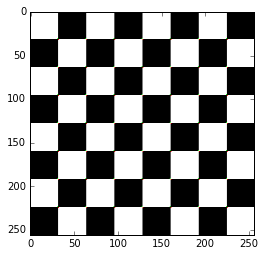

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

filename = 'C:/Users/BIG DATA/Anaconda2/imgs/ky.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray) #灰階圖物件ndarray的內容形態設定成float,精度32位元
dst = cv2.cornerHarris(gray,2,3,0.01) #找出角點
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0) #篩出角點的區域
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[255,0,0]
img[res[:,3],res[:,2]] = [0,255,0]

#cv2.imwrite('subpixel5.png',img)
plt.imshow(img)

參考文件:
http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0
cv2.threshold(灰階圖物件,篩選門檻值,最大值,最小值,使用模式)
門檻值為像素顏色0~255,因為只能傳入灰階圖,所以是區別黑-灰-白用的方法
###數值越低越接近黑色###
最大值或最小值不一定要都給,可以只給其中之一
門檻值越低=要更黑的才會被認作是黑色
模式有5種,請直接參考輸出效果
cv2.THRESH_BINARY:二分法,低於門檻值的視為黑色,否則是白色
cv2.THRESH_TRUNC: 還沒搞懂,可能是大於門檻值的都視為白色,其餘不變
cv2.THRESH_TOZERO: 門檻值以下視為黑色,以上的不變
INV輸出結果為反向選取,大於門檻值的視為黑色

參考文件:
http://blog.csdn.net/liqiang19910328/article/details/42761677
http://www.cnblogs.com/wei-li/archive/2012/05/23/2506940.html
將數張圖合併成一張圖輸出的方法
plt.subplot(numRows,numCols,plotNum)
numRows此圖合併了幾行
numCols此圖合併了幾列
plotNum第幾個格子,##左上格子為1號##
可配合plt.imshow(陣列[i])將陣列取出的圖片塞進去指定格子

<type 'float'>


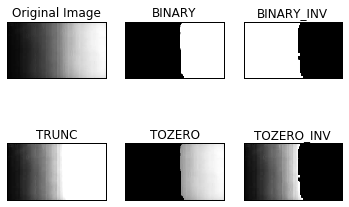

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/blck_white_gradient.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
#ret為float型態的變數(retvalue,retval.),用來代表通過門檻後的灰階圖深淺值分布
#逗號後面是物件名稱(通過門檻值的圖物件)
#此範例設定門檻值127,最大值255

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
#輸出的圖片標題

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
#將圖片物件放入物件陣列

for i in xrange(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i]) #每張圖加上標題,注意matplotlib不支援中文,會當掉
    plt.xticks([]),plt.yticks([]) #隱藏XY軸
plt.show()

利用門檻值作對低畫質圖片進行釐清辨識
結合其他函數去取得門檻值(一個變動值)而非直接寫死門檻值,會得到更好的釐清效果
cv2.adaptiveThreshold(灰階物件,最大值,函數方法,Block Size,C)
函數方法有2種:
cv2.ADAPTIVE_THRESH_MEAN_C:
由鄰近區域的深淺平均值作為門檻值,Block Size決定鄰近區域大小,C為門檻值上下加減的範圍
cv2.ADAPTIVE_THRESH_GAUSSIAN_C:
由鄰近區域的深淺去計算高思函數的權重值總合做為門檻值,Block Size與C如前述

參考文件:
http://www.cnblogs.com/denny402/p/3848316.html
cv2.medianBlur(圖片物件,ksize)
blur為平滑/模糊化處理,
由鄰近區域求出中位數,將該區域的顏色都以此中位數替代,
ksize定義範圍大小,
此值必須是奇數整數,否則會報錯
其他模糊處理方法請自行查看文件

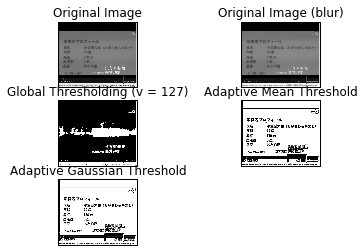

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/A01.jpg',0)
img_blur = cv2.medianBlur(img,5) #模糊處理

ret,th1 = cv2.threshold(img_blur,127,255,cv2.THRESH_BINARY)
#二分法門檻

th2 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#中位數門檻

th3 = cv2.adaptiveThreshold(img_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
#高斯權重值門檻

titles = ['Original Image','Original Image (blur)', 'Global Thresholding (v = 127)',
             'Adaptive Mean Threshold', 'Adaptive Gaussian Threshold']
images = [img, img_blur, th1, th2, th3] 

for i in xrange(5):
    plt.subplot(3,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

利用門檻值概念實作驗證碼內的雜訊清除

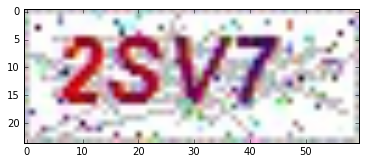

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/Captcha.jpg')
plt.imshow(img) #show出驗證碼截圖

##去除雜訊(噪音點/線,噪點/線)的做法##
參考文件:
http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html#gsc.tab=0
奧茲二分法(Otsu’s Binarization)
單純的灰階圖片在計算灰階深淺上應該會有一個非常高的波峰,
因為有圖形的部分顏色很黑,
噪點/線的顏色較淺,
##注意跟前面門檻值越低越黑的定義相反##
(請參考histogran的結果)
這會導致雜訊點/線會自己一組去產生另一個波峰,
接著設定門檻值,將不要的組別去除就能達到清除的目的;

奧茲二分法會找出兩個峰谷之間的界線切開,
利用此特性當作門檻值,
把雜訊的波峰段去除

在門檻值方法內引用奧茲二分法:
cv2.threshold(灰階圖物件,篩選門檻值,最大值/最小值,使用模式)
篩選門檻值一定要設為0,
模式設定為cv2.THRESH_BINARY+cv2.THRESH_OTSU,
參考文件原文:
"For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply pass zero."

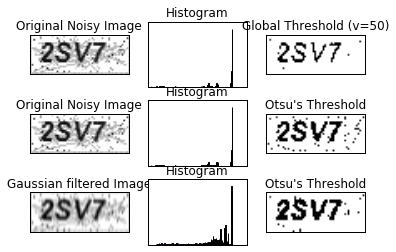

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

img = cv2.imread('C:/Users/BIG DATA/Anaconda2/imgs/Captcha.jpg',cv2.IMREAD_GRAYSCALE)

# global thresholding
ret1,th1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(1,3),0) #高斯模糊方法,請參考前面模糊方法的文件
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
           img, 0, th2,
           blur, 0, th3]  
#長條圖hist()方法為matplot內建繪圖,只需要在陣列內預留組合圖的空位,不用塞物件進去

titles = ['Original Noisy Image','Histogram','Global Threshold (v=50)',
           'Original Noisy Image','Histogram',"Otsu's Threshold",
           'Gaussian filtered Image','Histogram',"Otsu's Threshold"]
 
for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    #注意不是取出圖片物件plt.show出來;而是繪製圖片plt.hist放進去
    
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

d
